# Esercizio 2.1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, cauchy

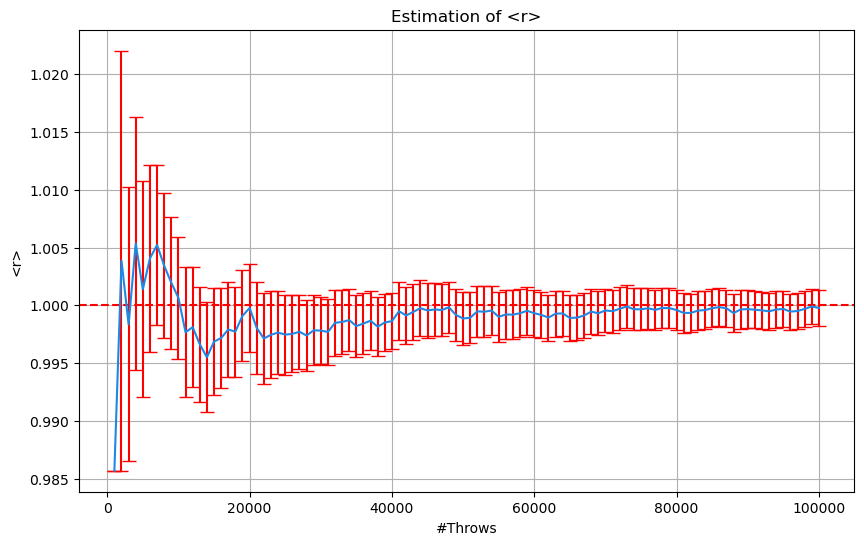

In [3]:
# Leggi i dati dal file
data = pd.read_csv('02.1/dataUniform.dat',sep=' ', header=None)

# Estrai le colonne
x = data[0]
y = data[1]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(1,figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color = '#1E88E5', ecolor='r', capsize=5)
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('#Throws')
plt.ylabel('<r>')
plt.title('Estimation of <r>')
plt.grid(True)
plt.show()



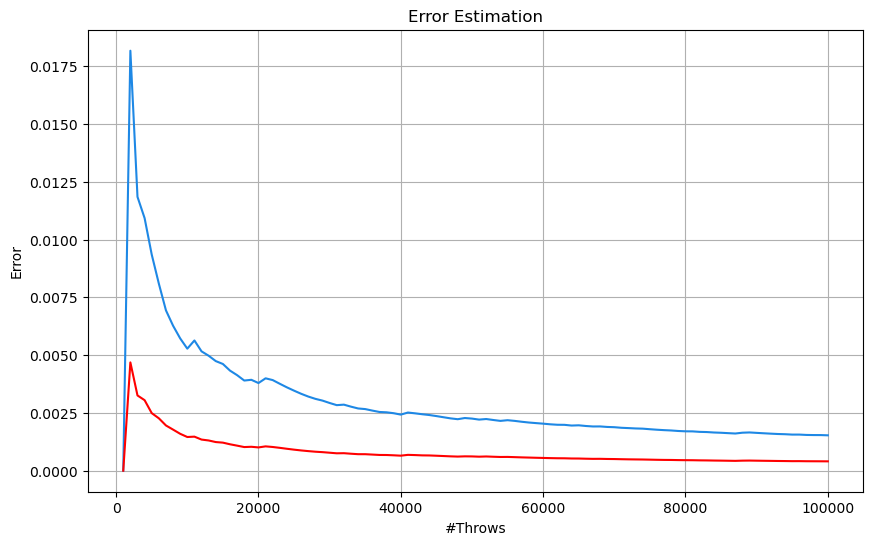

In [4]:
data = pd.read_csv('02.1/dataUniform.dat',sep=' ', header=None)
# Estrai le colonne
x = data[0]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(1,figsize=(10, 6))
plt.plot(x, yerr, color = '#1E88E5')
plt.xlabel('#Throws')
plt.ylabel('Error')
plt.title('Error Estimation')
plt.grid(True)

data1 = pd.read_csv('02.1/dataSampling.dat',sep=' ', header=None)

# Estrai le colonne
x1 = data1[0]
yerr1 = data1[2]

# Crea il grafico con barre di errore
plt.figure(1, figsize=(10, 6))
plt.plot(x1, yerr1, color = 'r')
plt.xlabel('#Throws')
plt.ylabel('Error')
plt.title('Error Estimation')
plt.grid(True)


Consideriamo la funzione di densità

$
f(x)=2-2x\quad \text{per } x\in[0,1],
$

la quale è una densità di probabilità, poiché

$
\int_0^1 (2-2x)\,dx = \Big[2x-x^2\Big]_0^1 = 2-1 = 1.
$

### 1. Calcolo della funzione cumulativa

La funzione cumulativa \(F(x)\) è data da

$
F(x)=\int_0^x (2-2t)\,dt.
$

Calcoliamo l'integrale:

$
F(x)=\left[2t-\;t^2\right]_0^x = 2x-x^2.
$

### 2. Calcolo della funzione inversa della cumulativa (quantile)

Per trovare la funzione inversa \(F^{-1}(p)\) risolviamo l'equazione

$
p=F(x)=2x-x^2,
$

ovvero

$
x^2-2x+p=0.
$

Trattandosi di un'equazione quadratica in \(x\), applichiamo la formula risolutiva:

$
x=\frac{2\pm\sqrt{4-4p}}{2} = 1\pm\sqrt{1-p}.
$

Osserviamo che, per \(p\in[0,1]\), la soluzione \(x=1+\sqrt{1-p}\) dà valori maggiori di 1, mentre quella corretta è

$
x=1-\sqrt{1-p}.
$

Pertanto, la funzione inversa della cumulativa (funzione quantile) è

$
\boxed{F^{-1}(p)=1-\sqrt{1-p}\quad\text{per } p\in[0,1].}
$

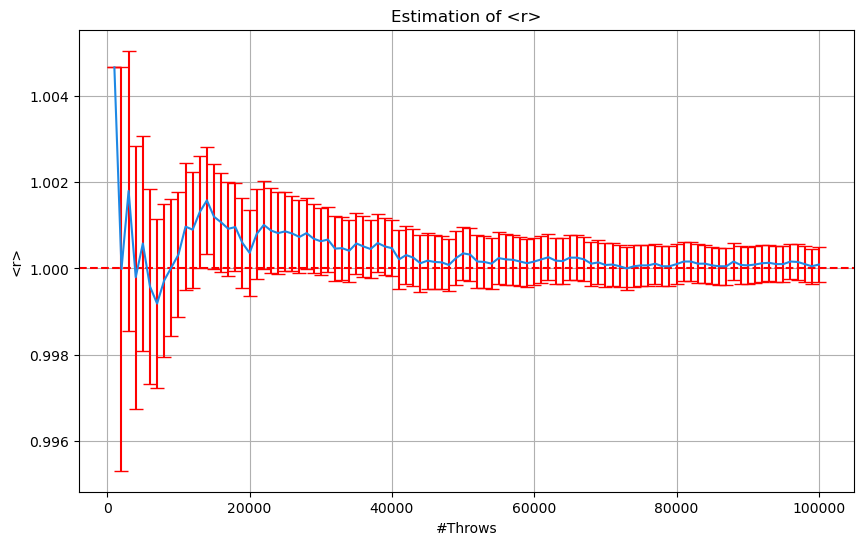

In [5]:
# Leggi i dati dal file
data = pd.read_csv('02.1/dataSampling.dat',sep=' ', header=None)

# Estrai le colonne
x = data[0]
y = data[1]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color = '#1E88E5', ecolor='r', capsize=5)
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('#Throws')
plt.ylabel('<r>')
plt.title('Estimation of <r>')
plt.grid(True)
plt.show()

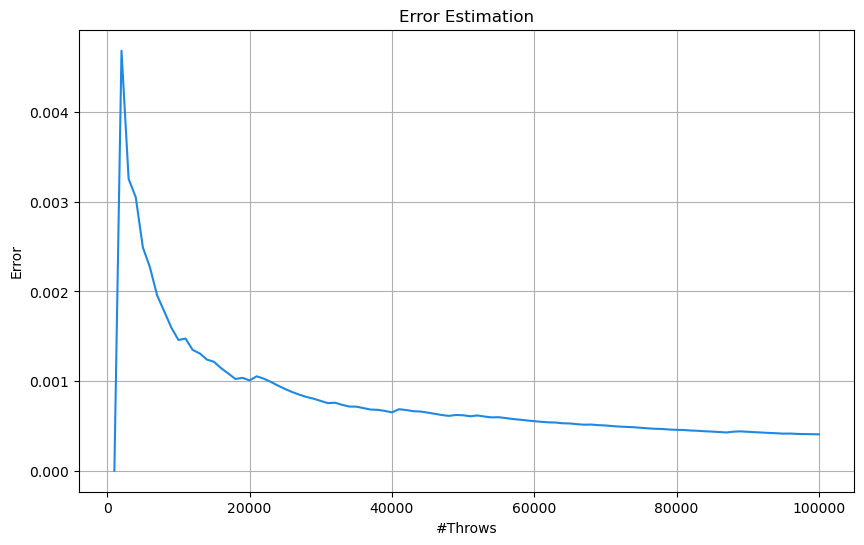

In [6]:
data = pd.read_csv('02.1/dataSampling.dat',sep=' ', header=None)

# Estrai le colonne
x = data[0]
yerr = data[2]

# Crea il grafico con barre di errore
plt.figure(figsize=(10, 6))
plt.plot(x, yerr, color = '#1E88E5')
plt.xlabel('#Throws')
plt.ylabel('Error')
plt.title('Error Estimation')
plt.grid(True)
plt.show()

# Esercizio 2.2